In [47]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [48]:
# Load coauthorship data
with open('data/author_data.json', 'r') as f:
    coauthorship_data = json.load(f)

# Load paper data
with open('data/paper_data.json', 'r') as f:
    paper_data = json.load(f)

In [49]:
coauthorship_df = pd.DataFrame.from_dict(coauthorship_data, orient='index')
paper_df = pd.DataFrame.from_dict(paper_data, orient='index')

In [50]:
paper_df['authors'] = paper_df['authors'].apply(lambda x: [author['id'] for author in x])
paper_df_exploded = paper_df.explode('authors')
paper_df_exploded = paper_df_exploded.rename(columns={'authors': 'author_id'})

# Merge datasets
merged_df = pd.merge(paper_df_exploded, coauthorship_df, left_on='author_id', right_index=True)

In [52]:
merged_df.head()

,title,publication year,author_id,abstract,keywords,metrics,link,article_number,references,citations,preferred name,first name,last name,aliases,affiliations,article count,publication topics,coAuthors,author publications
3244082,Session details: Queue management,2003,81100360141,No abstract available.,"[{'type': 'Index Terms', 'kwd': []}]","{'citationCount': 0, 'totalDownloads': 19}",https://dl.acm.org/doi/10.1145/3244082,3244082,[],[],none,Dina,Katabi,none,[MIT Computer Science & Artificial Intelligenc...,120,"[{'id': 'none', 'name': 'Network protocols', '...","[{'id': '99658631730', 'preferred name': 'none...",none
2934895,Eliminating Channel Feedback in Next-Generatio...,2016,81100360141,"This paper focuses on a simple, yet fundamenta...","[{'type': 'Index Terms', 'kwd': ['Networks', '...","{'citationCount': 80, 'totalDownloads': 3737}",https://dl.acm.org/doi/10.1145/2934872.2934895,2934895,[{'citation': '1.3rd Generation Partnership Pr...,"[{'citation': 'Isabona J, Ibitome L, Imoize A,...",none,Dina,Katabi,none,[MIT Computer Science & Artificial Intelligenc...,120,"[{'id': 'none', 'name': 'Network protocols', '...","[{'id': '99658631730', 'preferred name': 'none...",none
2934905,Real-time Distributed MIMO Systems,2016,81100360141,Recent years have seen a lot of work in moving...,"[{'type': 'Index Terms', 'kwd': ['Hardware', '...","{'citationCount': 52, 'totalDownloads': 4143}",https://dl.acm.org/doi/10.1145/2934872.2934905,2934905,[{'citation': 'An Introduction to pCell. http:...,"[{'citation': 'Ahmad A, Sonalika and Agarwal ...",none,Dina,Katabi,none,[MIT Computer Science & Artificial Intelligenc...,120,"[{'id': 'none', 'name': 'Network protocols', '...","[{'id': '99658631730', 'preferred name': 'none...",none
2790042,A Real-time 802.11 Compatible Distributed MIMO...,2015,81100360141,We present a demonstration of a real-time dist...,"[{'type': 'Index Terms', 'kwd': ['Hardware', '...","{'citationCount': 1, 'totalDownloads': 412}",https://dl.acm.org/doi/10.1145/2785956.2790042,2790042,[{'citation': 'Analog devices FMCOMMS2. http:/...,[],none,Dina,Katabi,none,[MIT Computer Science & Artificial Intelligenc...,120,"[{'id': 'none', 'name': 'Network protocols', '...","[{'id': '99658631730', 'preferred name': 'none...",none
2790043,Sub-Nanosecond Time of Flight on Commercial Wi...,2015,81100360141,The time-of-flight of a signal captures the ti...,"[{'type': 'Index Terms', 'kwd': ['Hardware', '...","{'citationCount': 14, 'totalDownloads': 518}",https://dl.acm.org/doi/10.1145/2785956.2790043,2790043,[{'citation': 'Bosch laser distance measurer g...,"[{'citation': 'Li C, De Bast S, Tanghe E, Poll...",none,Dina,Katabi,none,[MIT Computer Science & Artificial Intelligenc...,120,"[{'id': 'none', 'name': 'Network protocols', '...","[{'id': '99658631730', 'preferred name': 'none...",none


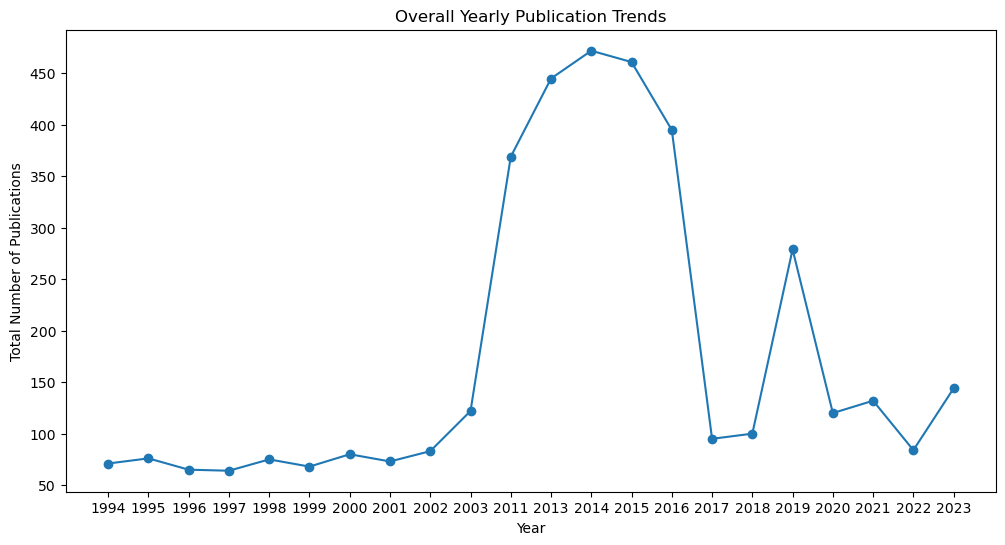

In [53]:
# Overall Yearly Publication Trends
yearly_trends = merged_df.groupby('publication year').size().reset_index(name='total_publications')

plt.figure(figsize=(12, 6))
plt.plot(yearly_trends['publication year'], yearly_trends['total_publications'], marker='o')
plt.title('Overall Yearly Publication Trends')
plt.xlabel('Year')
plt.ylabel('Total Number of Publications')
plt.show()

In [63]:
merged_df['research_areas'] = merged_df['keywords'].apply(lambda x: x[0]['kwd'])
merged_df['publication_year'] = merged_df['publication year'].astype(int)

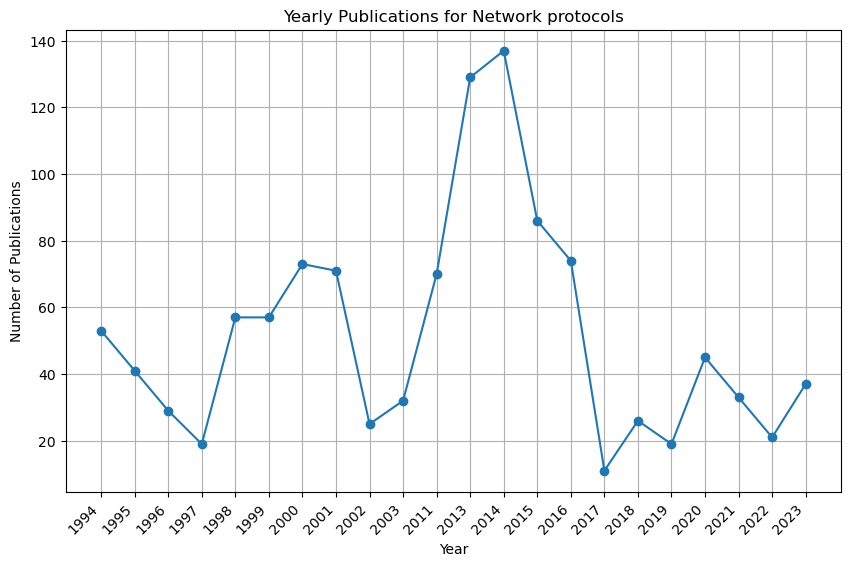

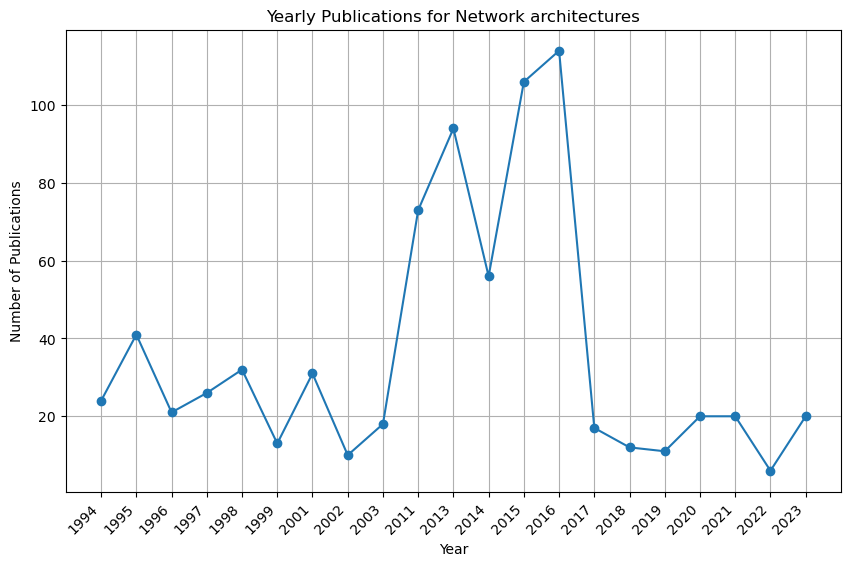

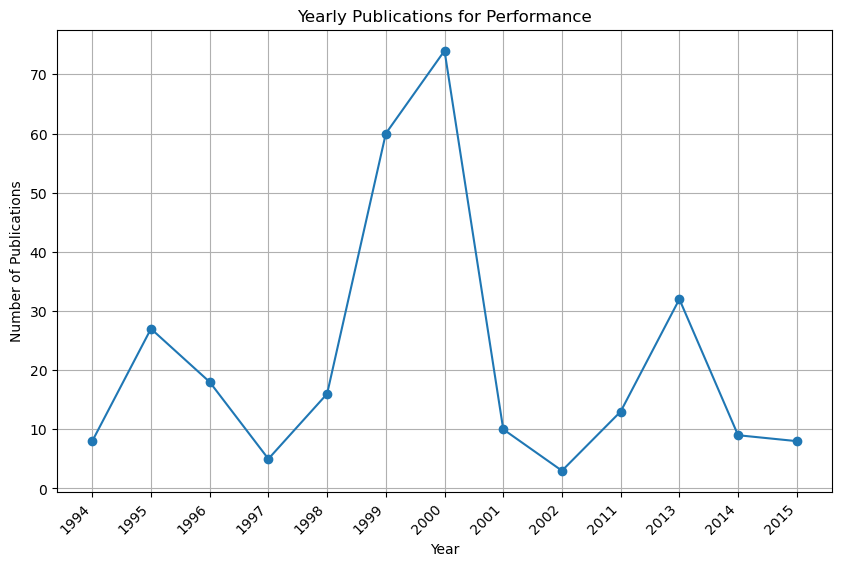

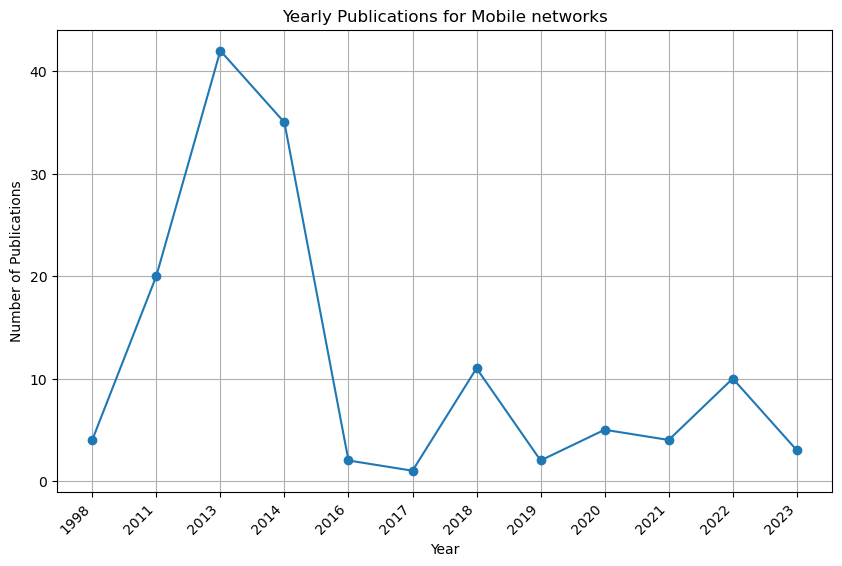

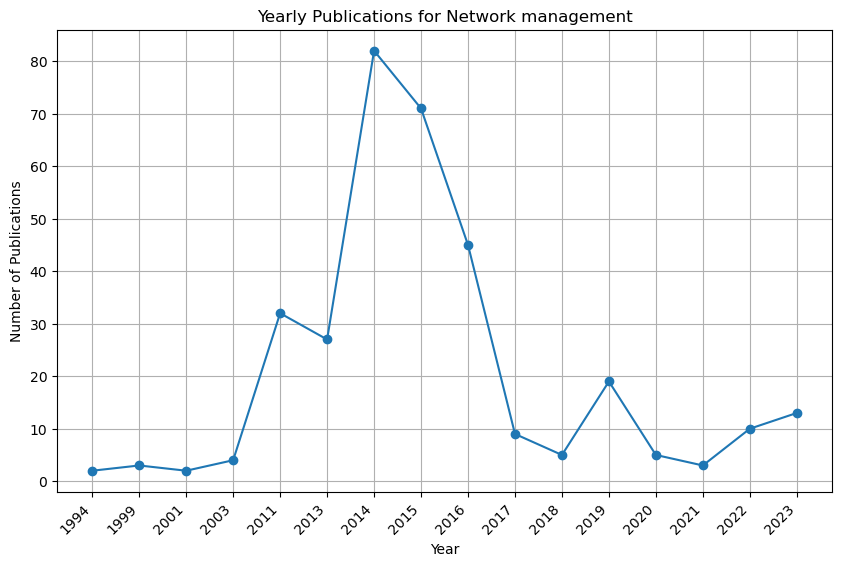

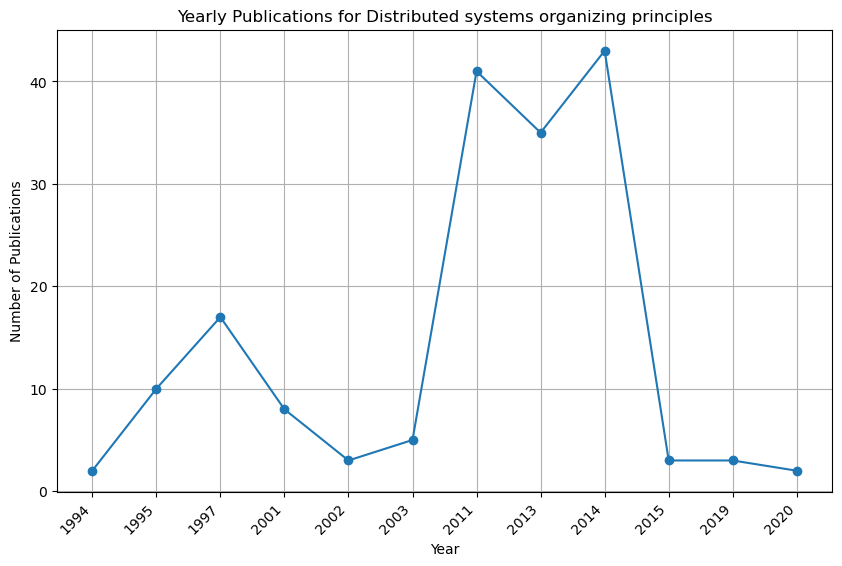

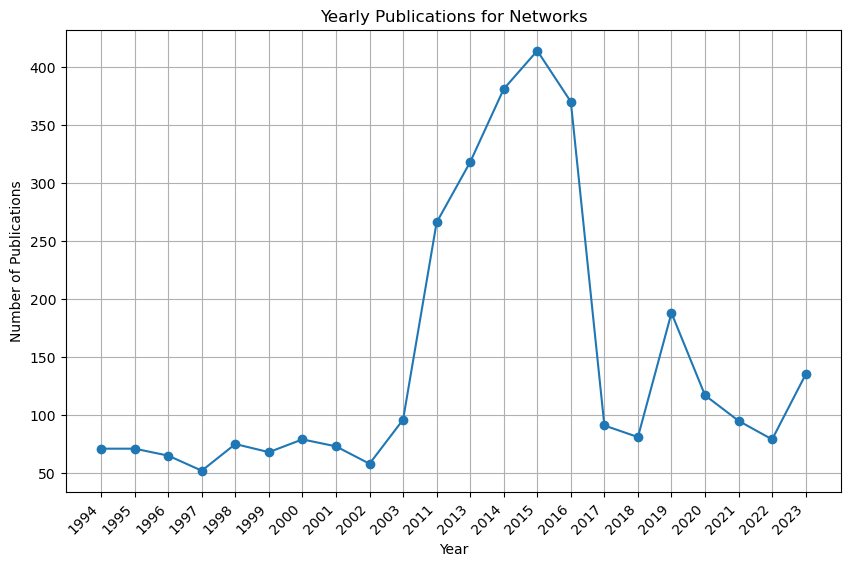

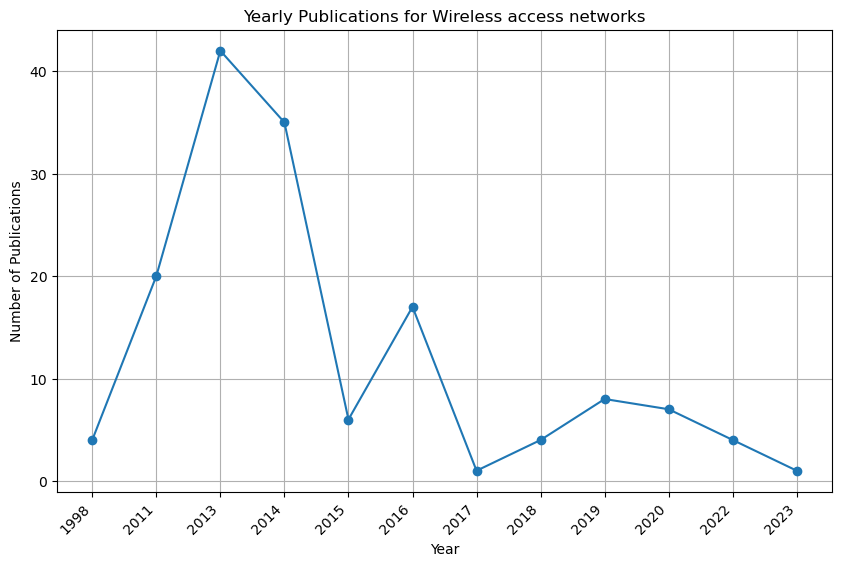

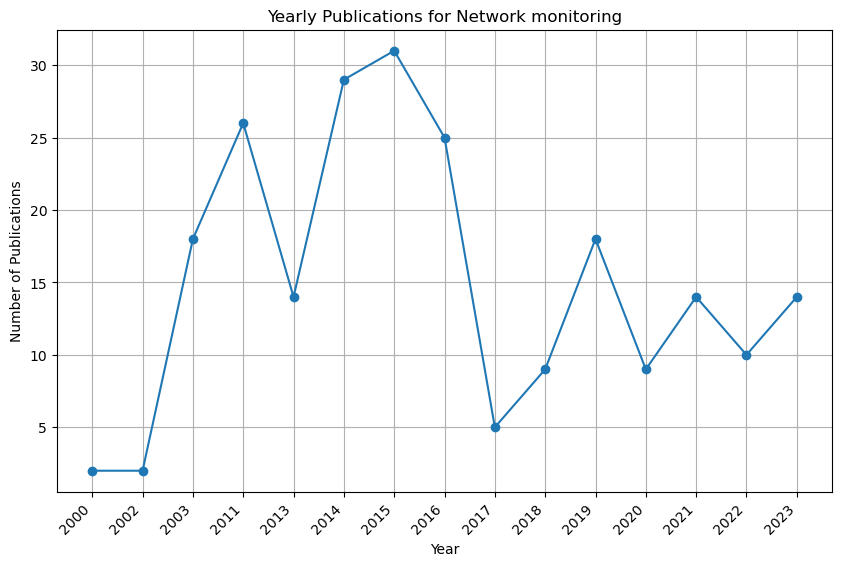

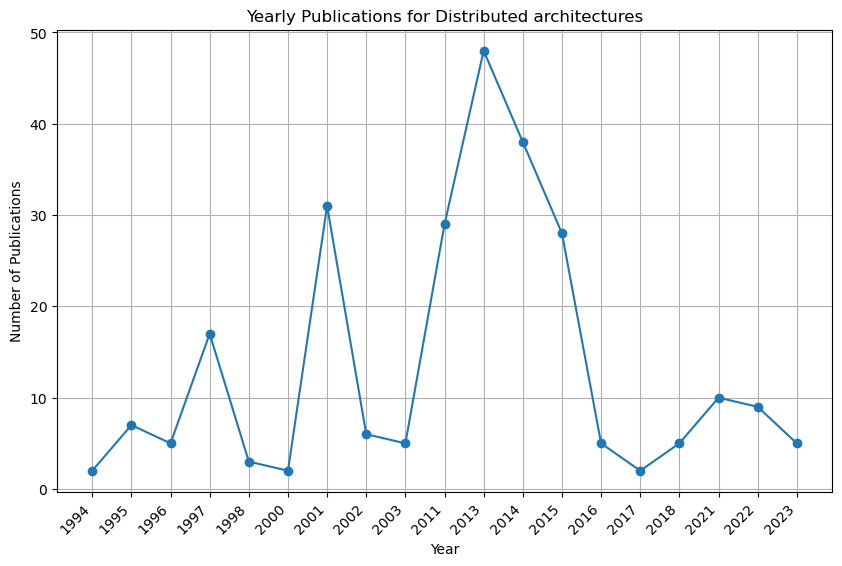

In [60]:
# Yearly Publication Trends by Research Areas
top_ten_research_areas = [
    'Network protocols', 'Network architectures', 'Performance', 'Mobile networks',
    'Network management', 'Distributed systems organizing principles', 'Networks',
    'Wireless access networks', 'Network monitoring', 'Distributed architectures'
]

filtered_df = merged_df.copy()

filtered_df['relevant_keywords'] = filtered_df['research_areas'].apply(lambda kws: [kw for kw in kws if kw in top_ten_research_areas])
filtered_df = filtered_df[filtered_df['relevant_keywords'].apply(len) > 0]

exploded_df = filtered_df.explode('relevant_keywords')

yearly_publications = exploded_df.groupby(['publication_year', 'relevant_keywords']).size().reset_index(name='publication_count')

for area in top_ten_research_areas:
    area_data = yearly_publications[yearly_publications['relevant_keywords'] == area]
    plt.figure(figsize=(10, 6))
    plt.plot(area_data['publication_year'], area_data['publication_count'], marker='o')
    plt.title(f'Yearly Publications for {area}')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Year')
    plt.ylabel('Number of Publications')
    plt.grid(True)
    plt.show()

In [65]:
# The difference in research areas during different time period
period_1_df = merged_df[(merged_df['publication_year'] >= 2013) & (merged_df['publication_year'] <= 2015)]
period_2_df = merged_df[(merged_df['publication_year'] >= 2021) & (merged_df['publication_year'] <= 2023)]

period_1_exploded = period_1_df.explode('research_areas')
period_2_exploded = period_2_df.explode('research_areas')

period_1_publications = period_1_exploded['research_areas'].value_counts().reset_index()
period_1_publications.columns = ['research_area', 'publication_count']

period_2_publications = period_2_exploded['research_areas'].value_counts().reset_index()
period_2_publications.columns = ['research_area', 'publication_count']

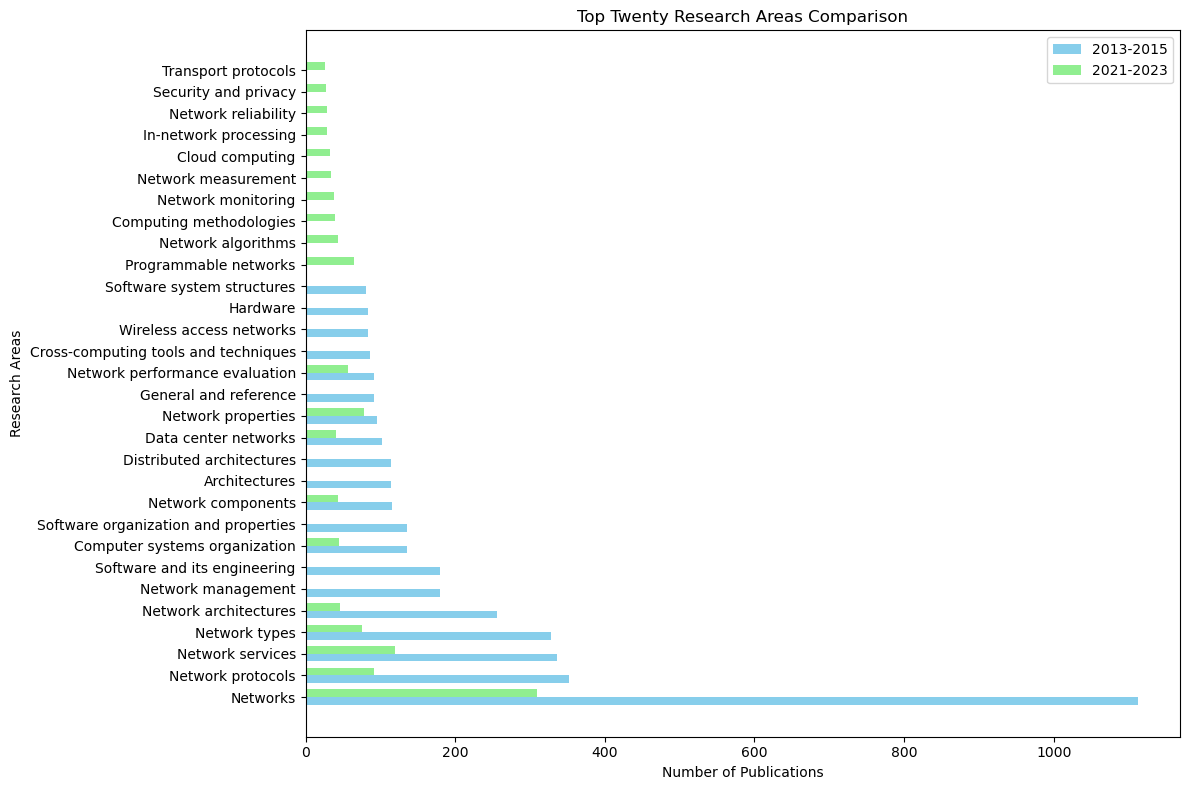

In [72]:
top_2013_2015 = period_1_publications.head(20)
top_2021_2023 = period_2_publications.head(20)

# Merge top ten data to ensure both sets of top ten are shown
combined_data = pd.merge(top_2013_2015, top_2021_2023, on='research_area', how='outer', suffixes=('_2013_2015', '_2021_2023')).fillna(0)

# Plot the combined data
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = range(len(combined_data))

bar1 = ax.barh(index, combined_data['publication_count_2013_2015'], bar_width, label='2013-2015', color='skyblue')
bar2 = ax.barh([i + bar_width for i in index], combined_data['publication_count_2021_2023'], bar_width, label='2021-2023', color='lightgreen')

ax.set_xlabel('Number of Publications')
ax.set_ylabel('Research Areas')
ax.set_yticks([i + bar_width / 2 for i in index])
ax.set_yticklabels(combined_data['research_area'])
ax.set_title('Top Twenty Research Areas Comparison')
ax.legend()

plt.tight_layout()
plt.show()

In [80]:
merged_df['citation_count'] = merged_df['metrics'].apply(lambda x: x['citationCount'])
merged_df['download_count'] = merged_df['metrics'].apply(lambda x: x['totalDownloads'])

yearly_totals = merged_df.groupby('publication_year').agg({
    'citation_count': 'sum',
    'download_count': 'sum',
    'title': 'count'
}).rename(columns={'title': 'total_publications'})

# Calculate average citations and downloads per publication per year
yearly_totals['average_citations'] = yearly_totals['citation_count'] / yearly_totals['total_publications']
yearly_totals['average_downloads'] = yearly_totals['download_count'] / yearly_totals['total_publications']

yearly_totals = yearly_totals.reset_index()

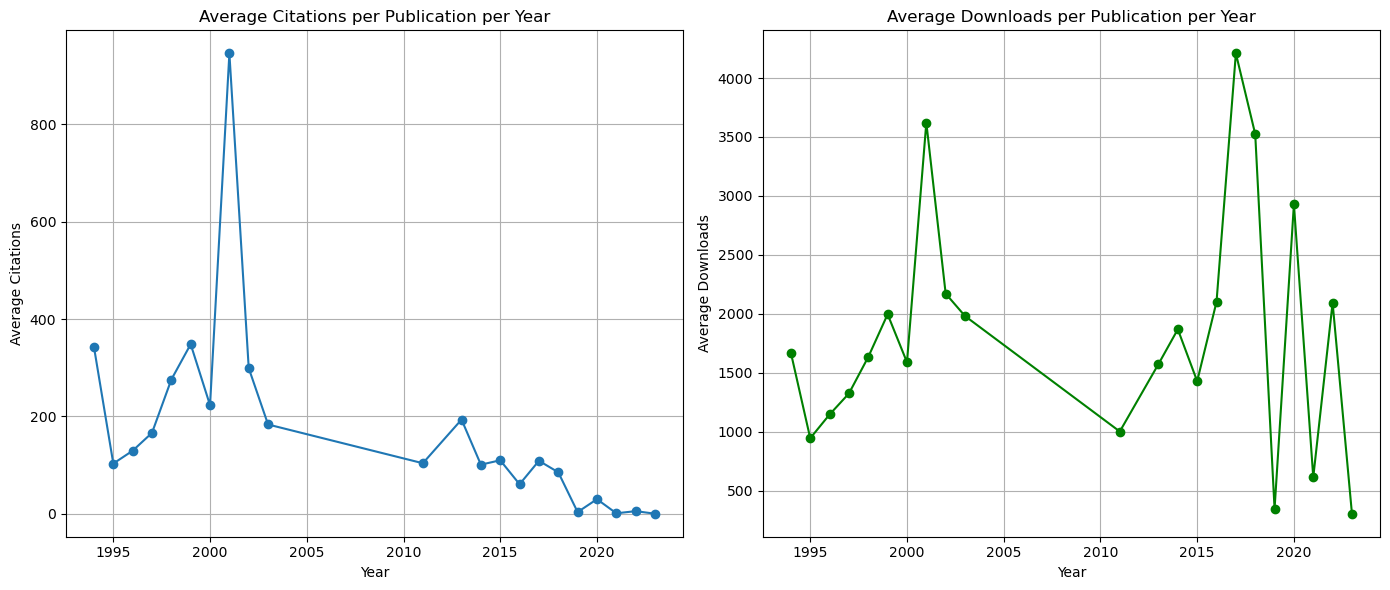

In [81]:
# Plot Average Citations and Downloads per Publication per Year
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(yearly_totals['publication_year'], yearly_totals['average_citations'], marker='o')
plt.title('Average Citations per Publication per Year')
plt.xlabel('Year')
plt.ylabel('Average Citations')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(yearly_totals['publication_year'], yearly_totals['average_downloads'], marker='o', color='green')
plt.title('Average Downloads per Publication per Year')
plt.xlabel('Year')
plt.ylabel('Average Downloads')
plt.grid(True)

plt.tight_layout()
plt.show()